# Explore here

In [2]:
import pandas as pd

URL= "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

total_data = pd.read_csv(URL)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(total_data.shape)

(768, 9)


In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Base de datos con 768 entradas, filas y 9 columnas.
Target: 'Outcome'

ELIMINAMOS FILAS DUPLICADAS

In [6]:
total_data.duplicated().sum()

np.int64(0)

ANÁLISIS DE VARIABLES

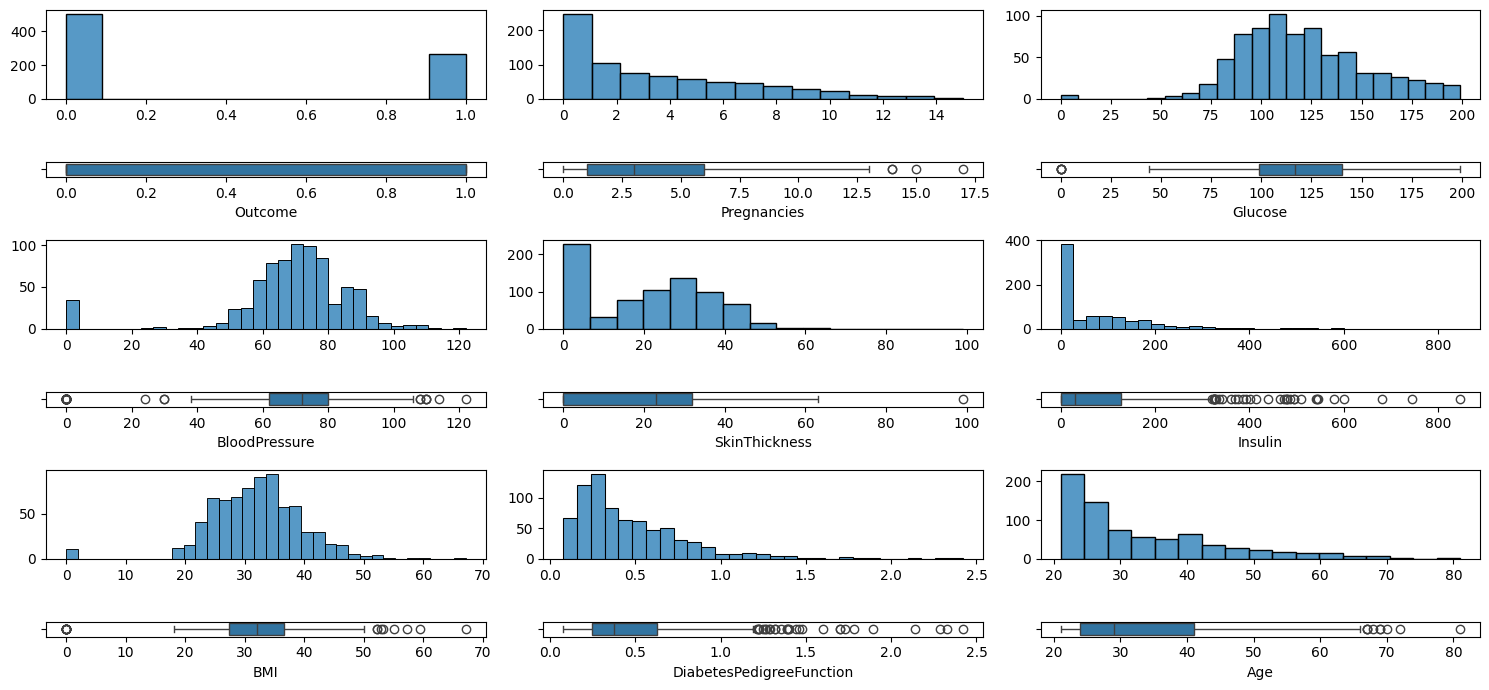

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(6, 3, figsize = (15, 7), gridspec_kw={'height_ratios': [6,1,6,1,6,1]})


# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data[total_data['Outcome']<1000], x = 'Outcome').set(xlabel = None,ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = 'Outcome')
sns.histplot(ax = axis[0, 1], data = total_data[total_data['Pregnancies']<17], x = 'Pregnancies').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = 'Pregnancies')
sns.histplot(ax = axis[0, 2], data = total_data[total_data['Glucose']<200], x = 'Glucose').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = 'Glucose')
sns.histplot(ax = axis[2, 0], data = total_data[total_data['BloodPressure']<150], x = 'BloodPressure').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[2, 1], data = total_data[total_data['SkinThickness']<100], x = 'SkinThickness').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = 'SkinThickness')
sns.histplot(ax = axis[2, 2], data = total_data[total_data['Insulin']<850], x = 'Insulin').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = 'Insulin')
sns.histplot(ax = axis[4, 0], data = total_data[total_data['BMI']<100], x = 'BMI').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 0], data = total_data, x = 'BMI')
sns.histplot(ax = axis[4, 1], data = total_data[total_data['DiabetesPedigreeFunction']<5], x = "DiabetesPedigreeFunction").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[4, 2], data = total_data[total_data['Age']<90], x = 'Age').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 2], data = total_data, x = 'Age')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Variables predictoras con outliers: 'Pregnancies', 'Insulin','BMI','DiabetesPedigreeFunction','Age'

Comparamos la relación entre el nuestra variable target 'Outcome' y las variables predictoras

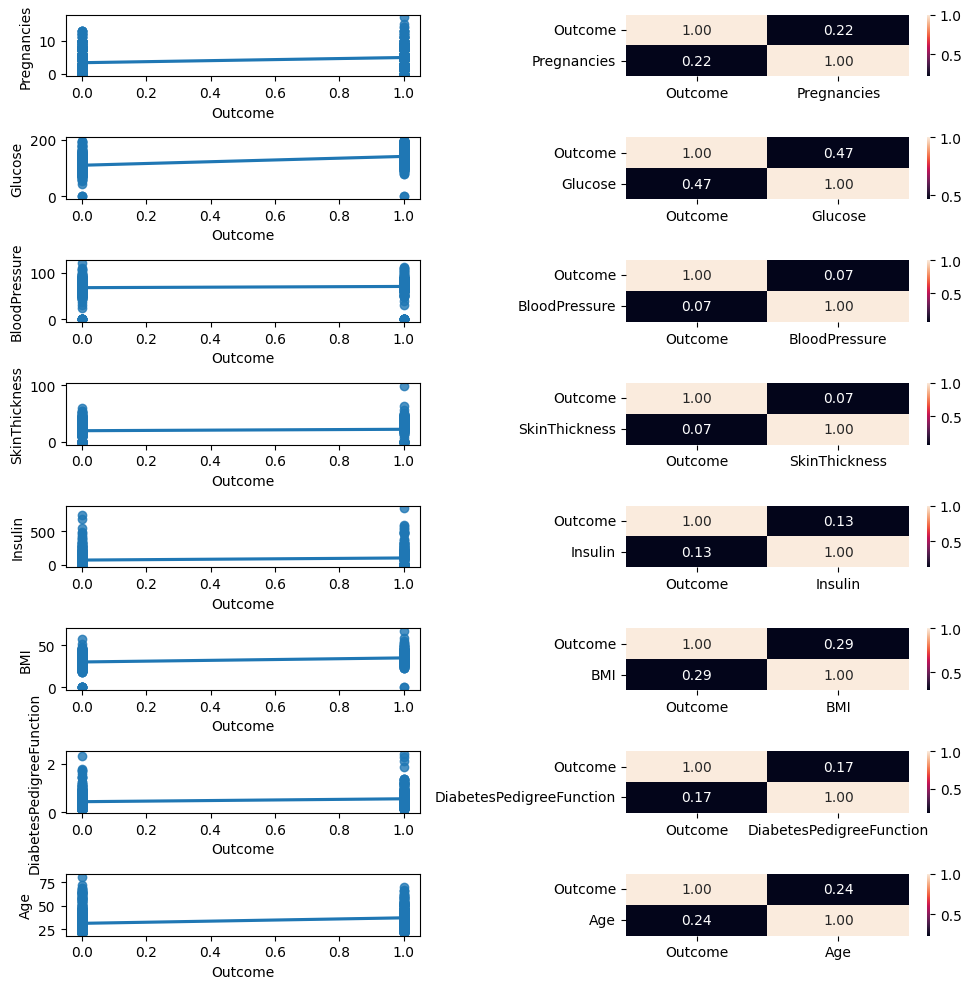

In [8]:
fig, axis = plt.subplots(8, 2, figsize = (10, 10))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = 'Outcome', y = 'Pregnancies')
sns.heatmap(total_data[['Outcome', 'Pregnancies']].corr(), annot = True, fmt = ".2f", ax = axis[0,1])
sns.regplot(ax = axis[1, 0], data = total_data, x = 'Outcome', y = 'Glucose')
sns.heatmap(total_data[['Outcome', 'Glucose']].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = total_data, x = 'Outcome', y = 'BloodPressure')
sns.heatmap(total_data[['Outcome', 'BloodPressure']].corr(), annot = True, fmt = ".2f", ax = axis[2, 1])
sns.regplot(ax = axis[3, 0], data = total_data, x = 'Outcome', y = 'SkinThickness')
sns.heatmap(total_data[['Outcome', 'SkinThickness']].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = total_data, x = 'Outcome', y = 'Insulin')
sns.heatmap(total_data[['Outcome', 'Insulin']].corr(), annot = True, fmt = ".2f", ax = axis[4,1])
sns.regplot(ax = axis[5, 0], data = total_data, x = 'Outcome', y = 'BMI')
sns.heatmap(total_data[['Outcome', 'BMI']].corr(), annot = True, fmt = ".2f", ax = axis[5, 1])
sns.regplot(ax = axis[6, 0], data = total_data, x = 'Outcome', y = 'DiabetesPedigreeFunction')
sns.heatmap(total_data[['Outcome', 'DiabetesPedigreeFunction']].corr(), annot = True, fmt = ".2f", ax = axis[6, 1])
sns.regplot(ax = axis[7, 0], data = total_data, x = 'Outcome', y = 'Age')
sns.heatmap(total_data[['Outcome', 'Age']].corr(), annot = True, fmt = ".2f", ax = axis[7, 1])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Destacamos correlaciones siginificativas con: 'Pregnancies','Glucose','BMI' y 'Age'

ANÁLISIS COMPLETO DE LA CORRELACIÓN DE TODAS LAS VARIABLES

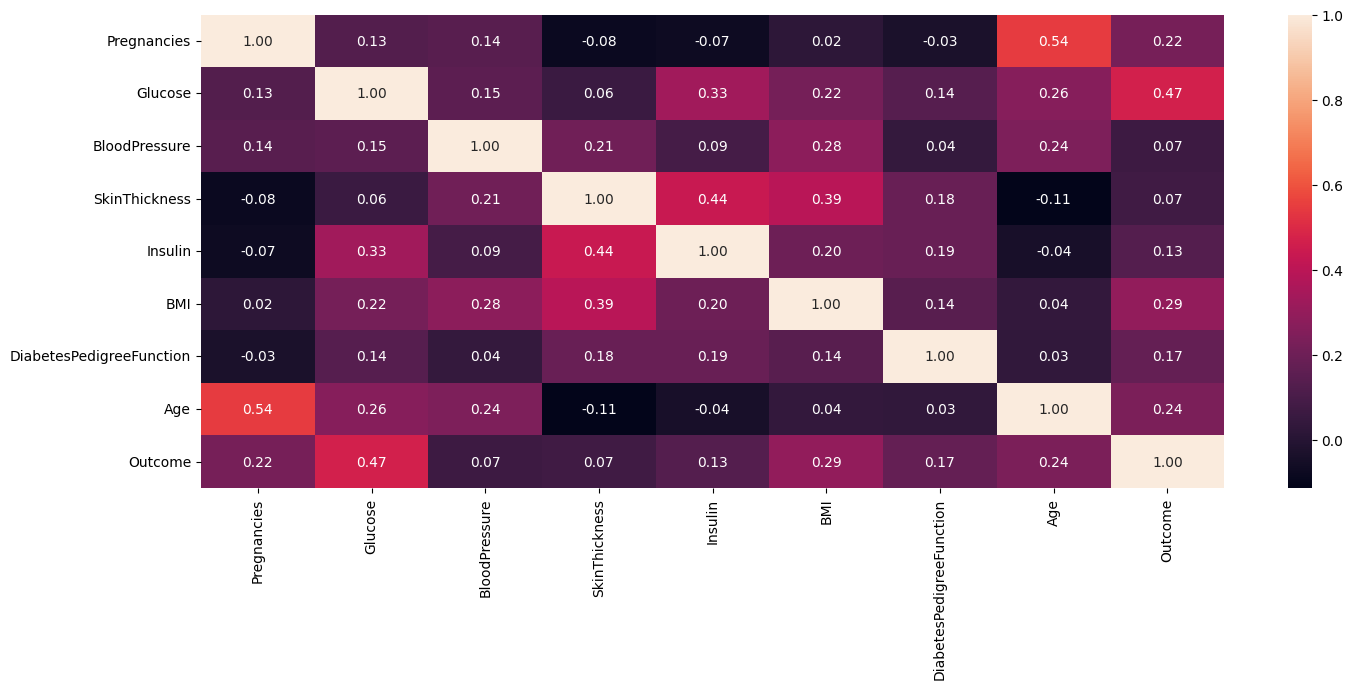

In [9]:
fig, axis = plt.subplots(figsize = (15, 7))
sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

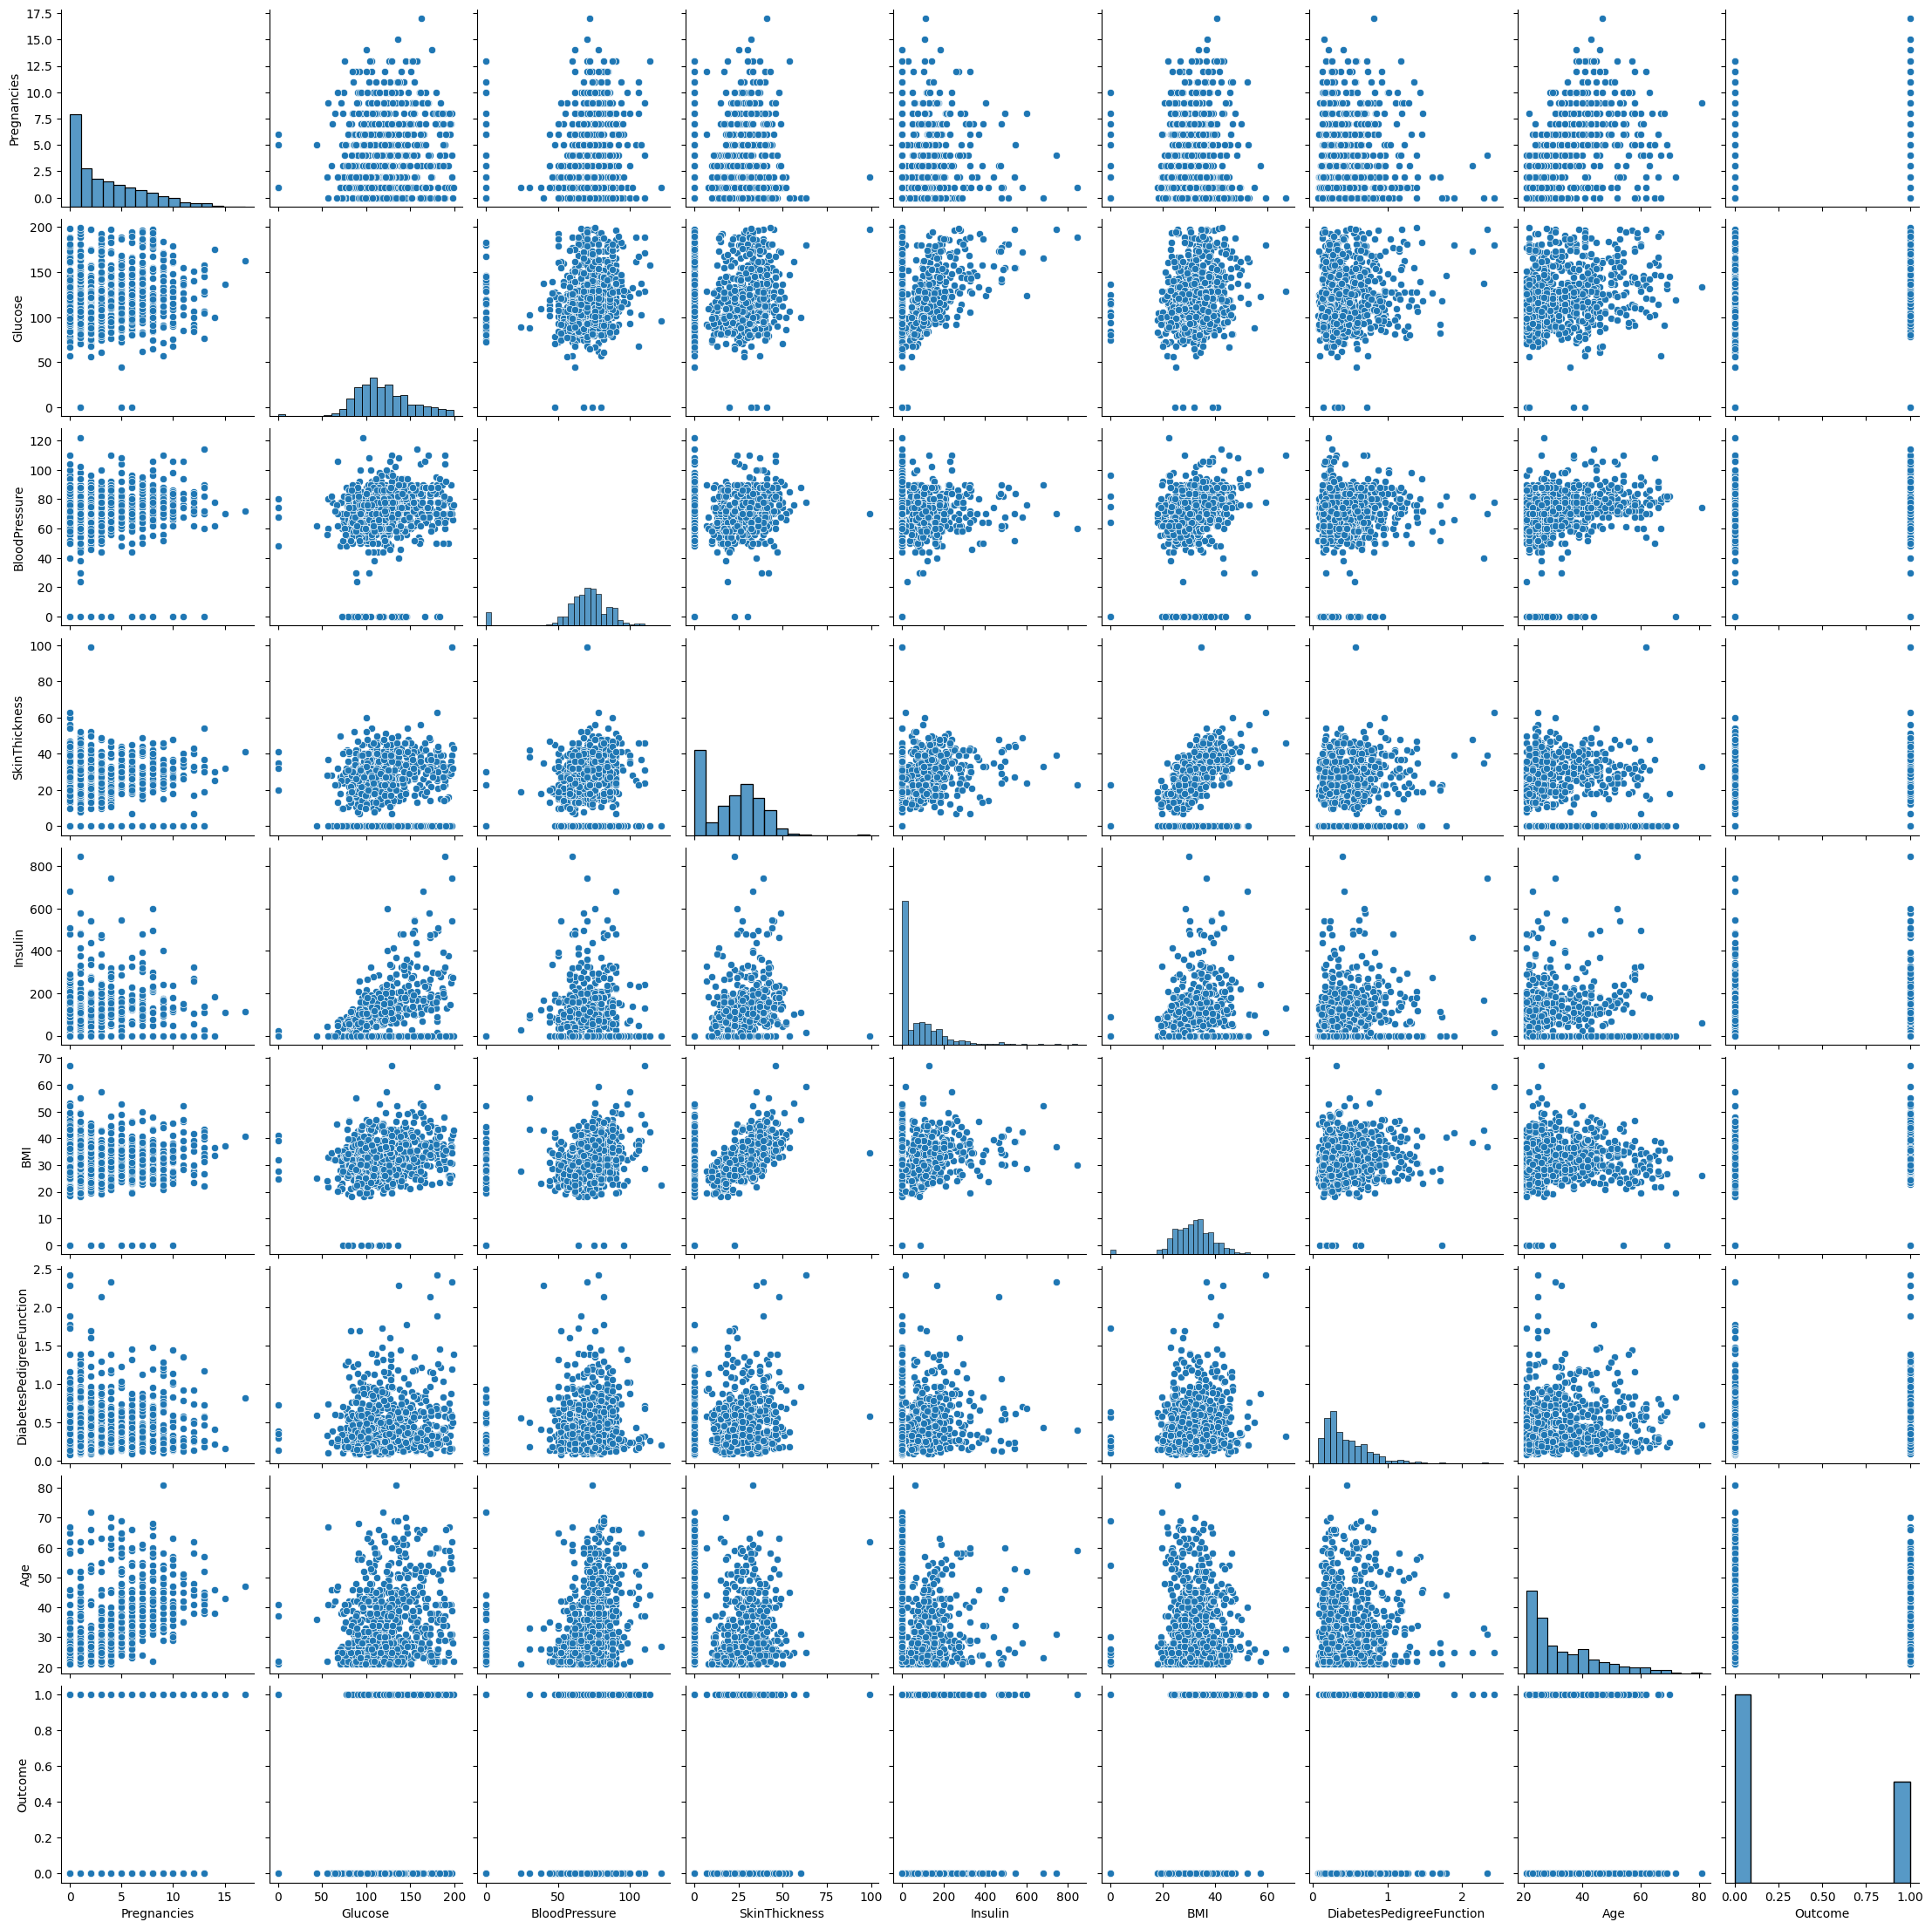

In [10]:
sns.pairplot(data = total_data)

FEATURE ENGINEERING // OUTLIERS

In [11]:
total_data_con_outliers=total_data.copy()
total_data_sin_outliers=total_data.copy()


In [12]:
total_stats =total_data.describe()
total_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


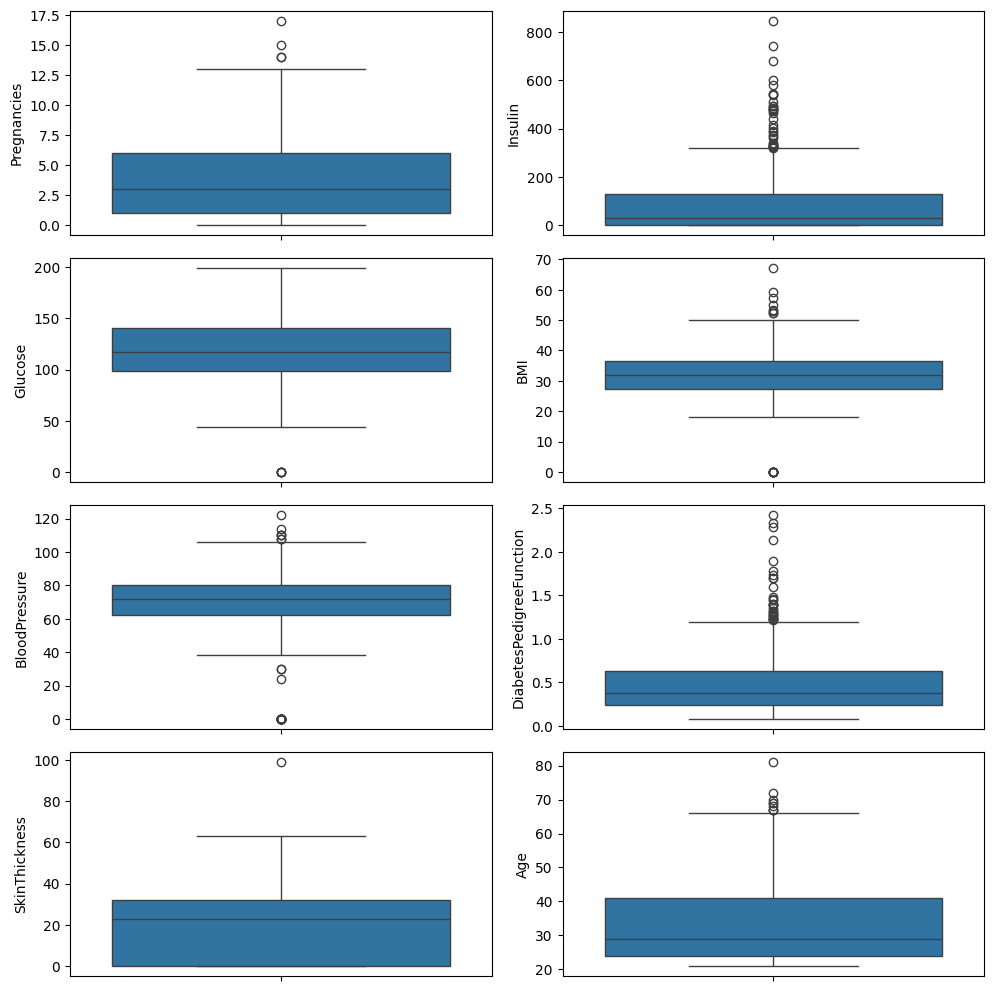

In [13]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Pregnancies") 
sns.boxplot(ax = axis[1, 0], data = total_data, y = "Glucose")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axis[3, 0], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "BMI")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[3, 1], data = total_data, y = "Age")

plt.tight_layout()

plt.show()

Actuamos sobre las variables predictoras con outliers excepto 'Age'

In [14]:
Pregnancies_stats = total_data["Pregnancies"].describe()
Glucose_stats = total_data["Glucose"].describe()
BloodPressure_stats = total_data["BloodPressure"].describe()
SkinThickness_stats = total_data["SkinThickness"].describe()
Insulin_stats = total_data["Insulin"].describe()
BMI_stats = total_data["BMI"].describe()
DiabetesPedigreeFunction_stats = total_data["DiabetesPedigreeFunction"].describe()


In [15]:
Pregnancies_iqr = Pregnancies_stats["75%"] - Pregnancies_stats["25%"]
upper_limit_pr = Pregnancies_stats["75%"] + 2 * Pregnancies_iqr
lower_limit_pr = Pregnancies_stats["25%"] - 2 * Pregnancies_iqr
if (lower_limit_pr<0): lower_limit_pr=0
total_data_sin_outliers["Pregnancies"]=total_data_sin_outliers["Pregnancies"].apply(lambda x:upper_limit_pr if (x > upper_limit_pr)else x)
print(f"Pregnancies: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_pr, 2)} y {round(lower_limit_pr, 2)}, con un rango intercuartílico de {round(Pregnancies_iqr, 2)}")
total_data_sin_outliers["Pregnancies"].describe()

Pregnancies: los límites superior e inferior para la búsqueda de outliers son 16.0 y 0, con un rango intercuartílico de 5.0


count    768.000000
mean       3.843750
std        3.364678
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       16.000000
Name: Pregnancies, dtype: float64

In [16]:
Glucose_iqr = Glucose_stats["75%"] - Glucose_stats["25%"]
upper_limit_gl = Glucose_stats["75%"] + 2 * Glucose_iqr
lower_limit_gl = Glucose_stats["25%"] - 2 * Glucose_iqr
if (lower_limit_gl<0): lower_limit_gl=0
total_data_sin_outliers["Glucose"]=total_data_sin_outliers["Glucose"].apply(lambda x:upper_limit_gl if (x > upper_limit_gl)else x)
print(f"Glucose: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_gl, 2)} y {round(lower_limit_gl, 2)}, con un rango intercuartílico de {round(Glucose_iqr, 2)}")
total_data_sin_outliers["Glucose"].describe()

Glucose: los límites superior e inferior para la búsqueda de outliers son 222.75 y 16.5, con un rango intercuartílico de 41.25


count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [17]:
BloodPressure_iqr = BloodPressure_stats["75%"] - BloodPressure_stats["25%"]
upper_limit_bl = BloodPressure_stats["75%"] + 2 * BloodPressure_iqr
lower_limit_bl = BloodPressure_stats["25%"] - 2 * BloodPressure_iqr
if (lower_limit_bl<0): lower_limit_bl=0
total_data_sin_outliers["BloodPressure"]=total_data_sin_outliers["BloodPressure"].apply(lambda x:upper_limit_bl if (x > upper_limit_bl)else x)
print(f"BloodPressure: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_bl, 2)} y {round(lower_limit_bl, 2)}, con un rango intercuartílico de {round(BloodPressure_iqr, 2)}")
total_data_sin_outliers["BloodPressure"].describe()

BloodPressure: los límites superior e inferior para la búsqueda de outliers son 116.0 y 26.0, con un rango intercuartílico de 18.0


count    768.000000
mean      69.097656
std       19.335630
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      116.000000
Name: BloodPressure, dtype: float64

In [18]:
SkinThickness_iqr = SkinThickness_stats["75%"] - SkinThickness_stats["25%"]
upper_limit_sk = SkinThickness_stats["75%"] + 2 * SkinThickness_iqr
lower_limit_sk = SkinThickness_stats["25%"] - 2 * SkinThickness_iqr
if (lower_limit_sk<0): lower_limit_sk=0
total_data_sin_outliers["SkinThickness"]=total_data_sin_outliers["SkinThickness"].apply(lambda x:upper_limit_sk if (x > upper_limit_sk)else x)
print(f"SkinThickness: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_sk, 2)} y {round(lower_limit_sk, 2)}, con un rango intercuartílico de {round(SkinThickness_iqr, 2)}")
total_data_sin_outliers["SkinThickness"].describe()

SkinThickness: los límites superior e inferior para la búsqueda de outliers son 96.0 y 0, con un rango intercuartílico de 32.0


count    768.000000
mean      20.532552
std       15.933335
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       96.000000
Name: SkinThickness, dtype: float64

In [19]:
Insulin_iqr = Insulin_stats["75%"] - Insulin_stats["25%"]
upper_limit_in = Insulin_stats["75%"] + 2 * Insulin_iqr
lower_limit_in = Insulin_stats["25%"] - 2 * Insulin_iqr
if (lower_limit_in<0): lower_limit_in=0
total_data_sin_outliers["Insulin"]=total_data_sin_outliers["Insulin"].apply(lambda x:upper_limit_in if (x > upper_limit_in)else x)
print(f"Insulin: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_in, 2)} y {round(lower_limit_in, 2)}, con un rango intercuartílico de {round(Insulin_iqr, 2)}")
total_data_sin_outliers["Insulin"].describe()

Insulin: los límites superior e inferior para la búsqueda de outliers son 381.75 y 0, con un rango intercuartílico de 127.25


count    768.000000
mean      75.793620
std       99.638759
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      381.750000
Name: Insulin, dtype: float64

In [20]:
BMI_iqr = BMI_stats["75%"] - BMI_stats["25%"]
upper_limit_bmi = BMI_stats["75%"] + 2 * BMI_iqr
lower_limit_bmi = BMI_stats["25%"] - 2 * BMI_iqr
if (lower_limit_bmi<0): lower_limit_bmi=0
total_data_sin_outliers["BMI"]=total_data_sin_outliers["BMI"].apply(lambda x:upper_limit_bmi if (x > upper_limit_bmi)else x)
print(f"BMI: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_bmi, 2)} y {round(lower_limit_bmi, 2)}, con un rango intercuartílico de {round(BMI_iqr, 2)}")
total_data_sin_outliers["BMI"].describe()

BMI: los límites superior e inferior para la búsqueda de outliers son 55.2 y 8.7, con un rango intercuartílico de 9.3


count    768.00000
mean      31.96888
std        7.80030
min        0.00000
25%       27.30000
50%       32.00000
75%       36.60000
max       55.20000
Name: BMI, dtype: float64

In [21]:
DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_stats["75%"] - DiabetesPedigreeFunction_stats["25%"]
upper_limit_dpf = DiabetesPedigreeFunction_stats["75%"] + 2 * DiabetesPedigreeFunction_iqr
lower_limit_dpf = DiabetesPedigreeFunction_stats["25%"] - 2 * DiabetesPedigreeFunction_iqr
if (lower_limit_dpf<0): lower_limit_dpf=0
total_data_sin_outliers["DiabetesPedigreeFunction"]=total_data_sin_outliers["DiabetesPedigreeFunction"].apply(lambda x:upper_limit_dpf if (x > upper_limit_dpf)else x)
print(f"DiabetesPedigreeFunction: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_dpf, 2)} y {round(lower_limit_dpf, 2)}, con un rango intercuartílico de {round(DiabetesPedigreeFunction_iqr, 2)}")
total_data_sin_outliers["DiabetesPedigreeFunction"].describe()

DiabetesPedigreeFunction: los límites superior e inferior para la búsqueda de outliers son 1.39 y 0, con un rango intercuartílico de 0.38


count    768.000000
mean       0.464221
std        0.300544
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        1.391250
Name: DiabetesPedigreeFunction, dtype: float64

In [22]:
total_data_con_outliers.to_csv("/workspaces/Arbol_de_decision_Pura_Campos/data/processed/total_data_con_outliers.csv", index=False)
total_data_sin_outliers.to_csv("/workspaces/Arbol_de_decision_Pura_Campos/data/processed/total_data_sin_outliers.csv", index=False)

CREAR DICCIONARIO PARA LOS OUTLIERS

In [23]:
import json

with open("Pregnancies.json", "w") as f:
  json.dump({"upper_limit_pr":upper_limit_pr,"lower_limit_pr":lower_limit_pr}, f)

with open("Glucose.json", "w") as f:
  json.dump({"upper_limit_gl":upper_limit_gl,"lower_limit_nr":lower_limit_gl}, f)

with open("BloodPressure.json", "w") as f:
  json.dump({"upper_limit_bl":upper_limit_bl,"lower_limit_bl":lower_limit_bl}, f)

with open("SkinThickness.json", "w") as f:
  json.dump({"upper_limit_sk":upper_limit_sk,"lower_limit_sk":lower_limit_sk}, f)

with open("Insulin.json", "w") as f:
  json.dump({"upper_limit_in":upper_limit_in,"lower_limit_in":lower_limit_in}, f)

with open("BMI.json", "w") as f:
  json.dump({"upper_limit_bmi":upper_limit_bmi,"lower_limit_bmi":lower_limit_bmi}, f)

with open("DiabetesPedigreeFunction.json", "w") as f:
  json.dump({"upper_limit_dpf":upper_limit_dpf,"lower_limit_dpf":lower_limit_dpf}, f)

ANÁLISIS DE VALORES FALTANTES / isnull()

In [24]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No encontramos valores nulos


ESCALADO DE VALORES (feature scaling)

In [25]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
X = total_data_sin_outliers.drop('Outcome', axis = 1)[num_variables]
y = total_data_sin_outliers['Outcome']

# # Dividimos el conjunto de datos en muestras de train y test
X_con = total_data_con_outliers.drop('Outcome', axis = 1)[num_variables]
y_con = total_data_con_outliers['Outcome']
X_sin = total_data_sin_outliers.drop('Outcome', axis = 1)[num_variables]
y_sin = total_data_sin_outliers['Outcome']

X_con_train, X_con_test, y_train, y_test = train_test_split(X_con, y_con, test_size = 0.2, random_state = 42)
X_sin_train, X_sin_test,_,_ = train_test_split(X_sin, y_sin, test_size = 0.2, random_state = 42)

In [27]:
X_con_train.to_csv("/workspaces/Arbol_de_decision_Pura_Campos/data/processed/X_con_train.csv", index=False)
X_con_test.to_csv("/workspaces/Arbol_de_decision_Pura_Campos/data/processed/X_con_test.csv", index=False)
X_sin_train.to_csv("/workspaces/Arbol_de_decision_Pura_Campos/data/processed/X_sin_train.csv", index=False)
X_sin_test.to_csv("/workspaces/Arbol_de_decision_Pura_Campos/data/processed/X_sin_test.csv", index=False)
y_train.to_csv("/workspaces/Arbol_de_decision_Pura_Campos/data/processed/y_train.csv", index=False)
y_test.to_csv("/workspaces/Arbol_de_decision_Pura_Campos/data/processed/y_test.csv", index=False)

El modelo requiere datos originales, por tanto no escalamos los datos.

MODELO

VISUALIZACIÓN DE LOS DATOS

<Axes: >

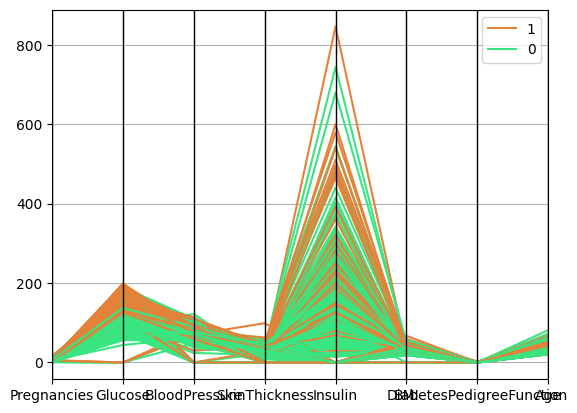

In [28]:

pd.plotting.parallel_coordinates(total_data,'Outcome', color = ("#E58139", "#39E581", "#8139E5"))

In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_sin_train, y_train)

DecisionTreeClassifier(random_state=42)

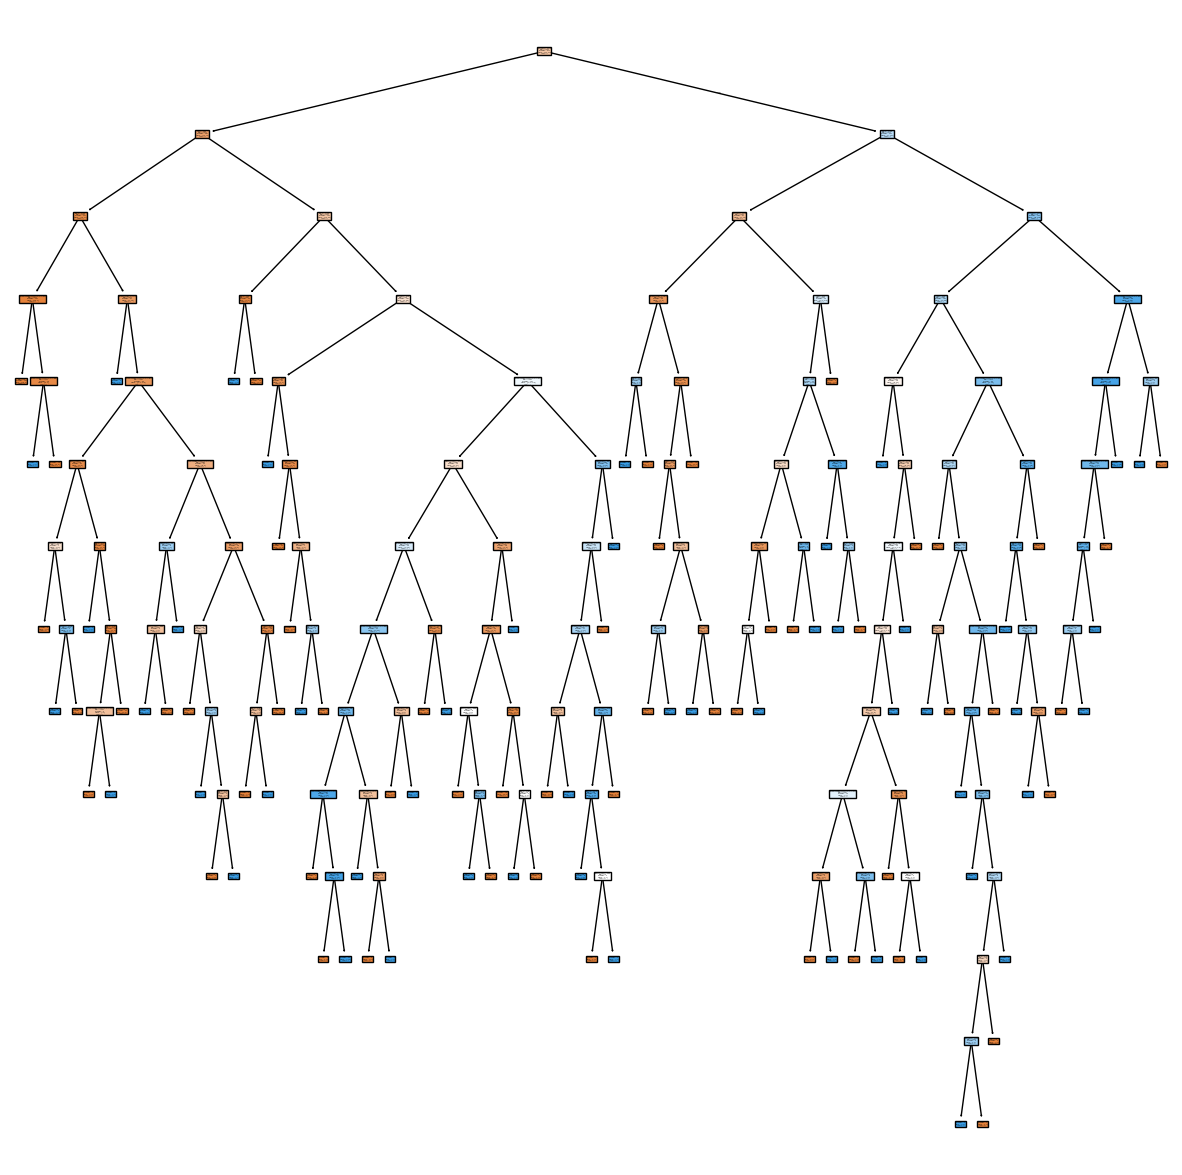

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_sin_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [31]:
y_pred = model.predict(X_sin_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [32]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 0.2597402597402597


In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7402597402597403

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params={
     "criterion": ['gini','entropy','log_loss'],
     "max_depth": randint(3,100),
     "min_samples_split": randint(3,10),
     "min_samples_leaf":  randint(3,800)     
 }
 
model = DecisionTreeClassifier(random_state = 42)

random_search=RandomizedSearchCV(model, params, n_iter=500,cv=5)

best_params=[]

random_search.fit(X_sin_train, y_train)

print("Best_params:",random_search.best_params_)

print("Best_accuracy:",random_search.best_score_)

Best_params: {'criterion': 'gini', 'max_depth': 93, 'min_samples_leaf': 15, 'min_samples_split': 4}
Best_accuracy: 0.7720111955217913
